In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

combi = pd.read_table('Historical_combi2.csv',delimiter =',')

combi=combi.fillna(0)
print(combi)


         Date  Dated Brent  Bonny light  Mars   WTI  Maya Europe  Maya USGC  \
0    1/1/2000         25.5          0.0   0.0   0.0          0.0        0.0   
1    1/2/2000         27.9          0.0   0.0   0.0          0.0        0.0   
2    1/3/2000         27.3          0.0   0.0   0.0          0.0        0.0   
3    1/4/2000         22.6          0.0   0.0   0.0          0.0        0.0   
4    1/5/2000         27.6          0.0   0.0   0.0          0.0        0.0   
..        ...          ...          ...   ...   ...          ...        ...   
231  1/4/2019         71.3          1.4  -2.3  -7.4         -9.8       -6.5   
232  1/5/2019         71.1          1.9  -4.3 -10.3        -10.1       -8.4   
233  1/6/2019         64.1          1.7  -4.6  -9.4         -8.1       -5.2   
234  1/7/2019         64.0          1.4  -2.0  -6.5         -6.9       -4.1   
235  1/8/2019         59.0          1.3  -1.9  -4.2        -12.6       -8.0   

     ESPO  Urals NWE  Urals MED  ...   FO 0.5%    V

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

In [148]:
model = Sequential()

#x_train=train_combi[["Dated Brent","Jet","ULSD","VGO 2%"]]

X = combi[["Dated Brent","Propane","Gasoline","Jet","Gasoil","FO 1%","ULSD","Naphtha","Butane","FO 3.5%","VGO 0.5%",
           "FO 0.5%","VGO 2%"]]
#X = combi[["Dated Brent","Jet","ULSD","VGO 2%"]]
y = combi["Urals NWE"].values


y=np.reshape(y, (-1,1)) 

y.shape


(236, 1)

In [155]:



#scaler_x = MinMaxScaler()
#scaler_y = MinMaxScaler()
#print(scaler_x.fit(X))
#xscale=scaler_x.transform(X)
#print(scaler_y.fit(y))
#yscale=scaler_y.transform(y)

#X = xscale
#y = yscale


scalery = MinMaxScaler(feature_range=(-1,1))
scalery.fit(y)
norm_y = scalery.transform(y)

scaler.fit(X)
norm_X = scaler.transform(X)



#inverse = scaler.inverse_transform(norm_y)
#inverse


In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(norm_X, norm_y, test_size=0.3)
X_train.shape


(165, 13)

In [134]:
#create model and optimiser
from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=30, input_dim=13,activation ="relu"))
    regressor.add(Dense(units=10,activation ="relu"))
    regressor.add(Dense(units=5,activation ="relu"))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

In [135]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=50,epochs=100,validation_split=0.2)

In [136]:
history=regressor.fit(X_train,y_train)

Train on 132 samples, validate on 33 samples
Epoch 1/100
132/132 [==============================] - 0s 1ms/step - loss: 0.5130 - mae: 0.6431 - accuracy: 0.0000e+00 - val_loss: 0.4454 - val_mae: 0.6012 - val_accuracy: 0.0000e+00
Epoch 2/100
132/132 [==============================] - 0s 68us/step - loss: 0.4452 - mae: 0.5976 - accuracy: 0.0000e+00 - val_loss: 0.4053 - val_mae: 0.5789 - val_accuracy: 0.0000e+00
Epoch 3/100
132/132 [==============================] - 0s 61us/step - loss: 0.3933 - mae: 0.5613 - accuracy: 0.0000e+00 - val_loss: 0.3756 - val_mae: 0.5602 - val_accuracy: 0.0000e+00
Epoch 4/100
132/132 [==============================] - 0s 59us/step - loss: 0.3470 - mae: 0.5254 - accuracy: 0.0000e+00 - val_loss: 0.3521 - val_mae: 0.5426 - val_accuracy: 0.0000e+00
Epoch 5/100
132/132 [==============================] - 0s 318us/step - loss: 0.3110 - mae: 0.4940 - accuracy: 0.0000e+00 - val_loss: 0.3361 - val_mae: 0.5300 - val_accuracy: 0.0000e+00
Epoch 6/100
132/132 [==============

Epoch 45/100
132/132 [==============================] - 0s 66us/step - loss: 0.0565 - mae: 0.1837 - accuracy: 0.0000e+00 - val_loss: 0.0810 - val_mae: 0.2125 - val_accuracy: 0.0000e+00
Epoch 46/100
132/132 [==============================] - 0s 75us/step - loss: 0.0545 - mae: 0.1802 - accuracy: 0.0000e+00 - val_loss: 0.0779 - val_mae: 0.2078 - val_accuracy: 0.0000e+00
Epoch 47/100
132/132 [==============================] - 0s 69us/step - loss: 0.0524 - mae: 0.1770 - accuracy: 0.0000e+00 - val_loss: 0.0749 - val_mae: 0.2036 - val_accuracy: 0.0000e+00
Epoch 48/100
132/132 [==============================] - 0s 61us/step - loss: 0.0501 - mae: 0.1741 - accuracy: 0.0000e+00 - val_loss: 0.0718 - val_mae: 0.1990 - val_accuracy: 0.0000e+00
Epoch 49/100
132/132 [==============================] - 0s 336us/step - loss: 0.0484 - mae: 0.1716 - accuracy: 0.0000e+00 - val_loss: 0.0689 - val_mae: 0.1946 - val_accuracy: 0.0000e+00
Epoch 50/100
132/132 [==============================] - 0s 67us/step - los

132/132 [==============================] - 0s 75us/step - loss: 0.0278 - mae: 0.1283 - accuracy: 0.0000e+00 - val_loss: 0.0392 - val_mae: 0.1501 - val_accuracy: 0.0000e+00
Epoch 90/100
132/132 [==============================] - 0s 67us/step - loss: 0.0276 - mae: 0.1279 - accuracy: 0.0000e+00 - val_loss: 0.0392 - val_mae: 0.1499 - val_accuracy: 0.0000e+00
Epoch 91/100
132/132 [==============================] - 0s 78us/step - loss: 0.0275 - mae: 0.1276 - accuracy: 0.0000e+00 - val_loss: 0.0392 - val_mae: 0.1500 - val_accuracy: 0.0000e+00
Epoch 92/100
132/132 [==============================] - 0s 344us/step - loss: 0.0273 - mae: 0.1273 - accuracy: 0.0000e+00 - val_loss: 0.0392 - val_mae: 0.1502 - val_accuracy: 0.0000e+00
Epoch 93/100
132/132 [==============================] - 0s 75us/step - loss: 0.0272 - mae: 0.1269 - accuracy: 0.0000e+00 - val_loss: 0.0391 - val_mae: 0.1506 - val_accuracy: 0.0000e+00
Epoch 94/100
132/132 [==============================] - 0s 82us/step - loss: 0.0269 - m

dict_keys(['val_loss', 'val_mae', 'val_accuracy', 'loss', 'mae', 'accuracy'])


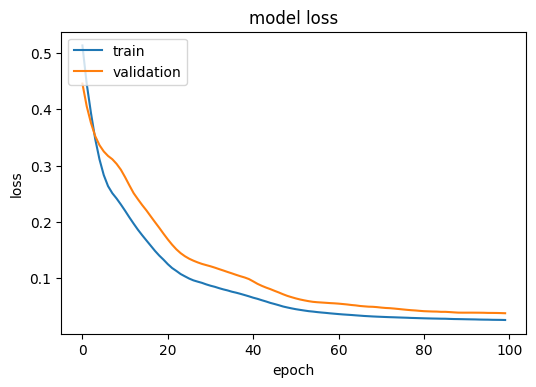

In [137]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



In [159]:
#X_test= scaler_x.transform(X_test)



y_pred_keras= regressor.predict(X_test)
y_pred_keras=np.reshape(y_pred_keras, (-1,1))
y_pred_keras_iv = scalery.inverse_transform(y_pred_keras)
y_pred_keras_iv
#y_pred_keras=np.reshape(y_pred_keras, (-1,1))
#y_pred_keras = scaler_y.inverse_transform(y_pred_keras) 


array([[-1.0305172 ],
       [-3.2150319 ],
       [-1.291351  ],
       [-2.893389  ],
       [-1.2506033 ],
       [-1.3031703 ],
       [-1.3203756 ],
       [-1.1456989 ],
       [-1.0954431 ],
       [-2.3556297 ],
       [-1.5882224 ],
       [-2.1487272 ],
       [-1.2324718 ],
       [-1.4663094 ],
       [-2.8693366 ],
       [-1.0096134 ],
       [-3.9518423 ],
       [-1.5734805 ],
       [-1.3336908 ],
       [-1.4114019 ],
       [-1.2631091 ],
       [-1.6652211 ],
       [-4.545412  ],
       [-0.9254199 ],
       [-1.2678825 ],
       [-1.1088959 ],
       [-1.2052709 ],
       [-1.6778013 ],
       [-0.96271455],
       [-2.043046  ],
       [-1.0078427 ],
       [-0.866851  ],
       [-3.6715007 ],
       [-2.5240467 ],
       [-1.4162754 ],
       [-3.1376643 ],
       [-1.6857811 ],
       [-2.0342448 ],
       [-2.409165  ],
       [-1.7590314 ],
       [-1.2958556 ],
       [-2.078355  ],
       [-1.5887681 ],
       [-1.9395205 ],
       [-1.1011881 ],
       [-1

In [135]:
yy= combi["Urals NWE"].iloc[-8:]
yy

228    0.0
229   -0.4
230   -0.3
231   -0.1
232   -0.9
233   -2.7
234   -1.1
235   -0.1
Name: Urals NWE, dtype: float64

(-5, 0)

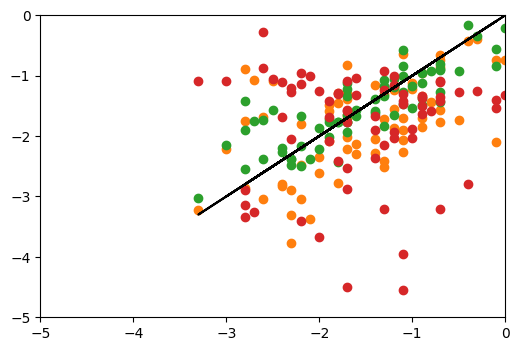

In [165]:
plt.plot(combi["Urals NWE"].iloc[165:],combi["Urals NWE"].iloc[165:],'k')
plt.scatter(combi["Urals NWE"].iloc[165:],y_predL)
plt.scatter(combi["Urals NWE"].iloc[165:],y_predNL)
plt.scatter(combi["Urals NWE"].iloc[165:],y_pred)
plt.scatter(combi["Urals NWE"].iloc[165:],y_pred_keras_iv)


plt.xlim([-5 ,0])
plt.ylim([-5 ,0])

Text(0, 0.5, 'Azeri BTC')

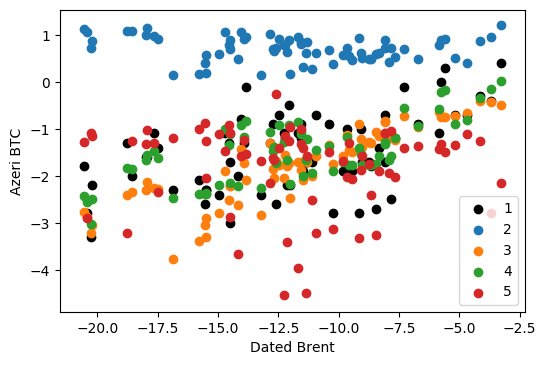

In [164]:
plt.scatter(combi["FO 3.5%"].iloc[165:],combi["Urals NWE"].iloc[165:],color = 'black')
plt.scatter(combi["FO 3.5%"].iloc[165:],y_predL)
plt.scatter(combi["FO 3.5%"].iloc[165:],y_predNL)
plt.scatter(combi["FO 3.5%"].iloc[165:],y_pred)
plt.scatter(combi["FO 3.5%"].iloc[165:],y_pred_keras_iv)

plt.legend(("1", "2","3",'4','5','6'))
plt.xlabel('Dated Brent')
plt.ylabel('Azeri BTC')

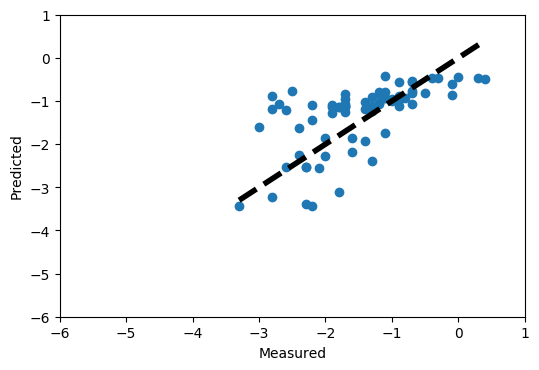

In [12]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlim([-6,1])
plt.ylim([-6,1])
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

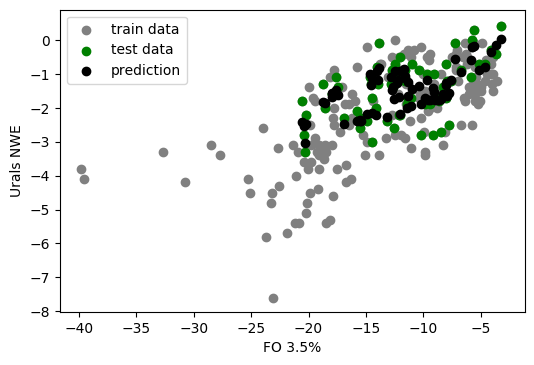

Mean squared error: 0.24
Feature ranking:
Feature Dated Brent (0.142642)
Feature Gasoil (0.158948)
Feature FO 3.5% (0.698410)


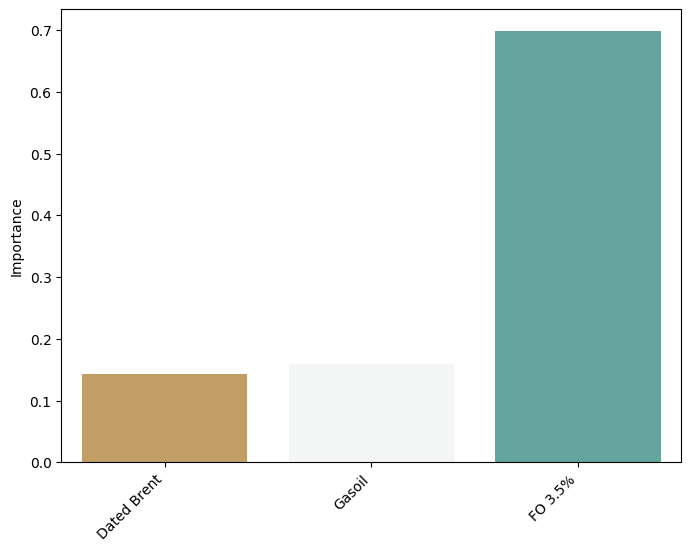

In [61]:
from sklearn.ensemble import RandomForestRegressor
train_combi = combi.iloc[:]
test_combi = combi.iloc[165:]

plt.rcParams['figure.dpi'] = 100

#x_train=train_combi.drop("Oman",axis=1)
#x_train=train_combi[train_combi.columns.difference(["Dated Brent","Propane","Butane","Gasoline","Jet","Gasoil"
#                                                   ,"FO 1%","ULSD","NAphtha","Butane","FO 3.5%","VGO 0.5%","FO 0.5%"
#                                                    ,"VGO 2%"])]
x_train=train_combi[["Dated Brent","Gasoil","FO 3.5%"]]
y_train=train_combi["Urals NWE"]

#df.drop('b', axis=1)

#x_test=train_combi.drop("Oman",axis=1)
#x_test=test_combi[test_combi.columns.difference(["Dated Brent","Propane","Butane","Gasoline","Jet","Gasoil"
#                                                  ,"FO 1%","ULSD","NAphtha","Butane","FO 3.5%","VGO 0.5%","FO 0.5%"
#                                                    ,"VGO 2%"])]
x_test=test_combi[["Dated Brent","Gasoil","FO 3.5%"]]
y_test=test_combi["Urals NWE"].to_frame()



regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train["FO 3.5%"],y_train,   color='grey')
plt_test=plt.scatter(x_test["FO 3.5%"],y_test,   color='green')
plt_pred=plt.scatter(x_test["FO 3.5%"], y_pred,  color='black')



plt.xlabel("FO 3.5%")
plt.ylabel("Urals NWE")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



In [62]:
y_pred=regressor.predict(combi[["Dated Brent","Gasoil","FO 3.5%"]].iloc[165:])

In [66]:
y_predNL = 0.221579893076645*(combi["FO 3.5%"].iloc[165:]) + 0.0169570894526404*(combi["Dated Brent"].iloc[165:]) - 0.0154492977171762 - 0.0697233738254049*combi["Gasoil"].iloc[165:] - 0.00856228790867718*combi["Gasoil"].iloc[165:]*(combi["FO 3.5%"].iloc[165:]) - 0.00421761896551571*(combi["FO 3.5%"].iloc[165:])**2

In [109]:
y_predNL = 2 - 0.0186675105114445*combi["Dated Brent"].iloc[165:]*np.exp(-7.82878945629328e-9*combi["Propane"].iloc[165:]*combi["Naphtha"].iloc[165:]*np.power(combi["Dated Brent"].iloc[165:],3))



In [73]:
from sklearn import linear_model
import statsmodels.api as sm
X = combi[['Dated Brent','Gasoil','FO 3.5%']]
Y = combi['Urals NWE']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)
y_predL = regr.intercept_+ regr.coef_[0]*combi["Dated Brent"].iloc[165:] + regr.coef_[1]*combi["Gasoil"].iloc[165:] 
+regr.coef_[2]*combi["FO 3.5%"].iloc[165:] 


Intercept: 
 -0.577407657119402
Coefficients: 
 [0.00380141 0.08000778 0.1819775 ]
                            OLS Regression Results                            
Dep. Variable:              Urals NWE   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     189.0
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           5.28e-62
Time:                        12:30:53   Log-Likelihood:                -258.54
No. Observations:                 236   AIC:                             525.1
Df Residuals:                     232   BIC:                             538.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


165   -3.262931
166   -3.419003
167   -3.740680
168   -3.719184
169   -3.381029
         ...   
231   -1.327132
232   -1.895120
233   -1.535277
234   -1.062741
235   -2.520292
Name: FO 3.5%, Length: 71, dtype: float64